In [ ]:
!pip install tensorflow keras numpy matplotlib scikit-image scikit-learn

In [ ]:
# fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')


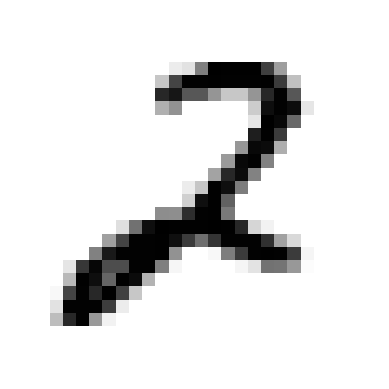

In [4]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()


In [9]:
import numpy as np

# Ensure x and y are NumPy arrays if they are not already
x = np.array(x)
y = np.array(y)

# Splitting the dataset into training and test sets
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# Shuffle the training set to avoid any ordering bias
shuffle_index = np.random.permutation(60000)

# Apply the shuffle to NumPy arrays
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a binary detector for the digit '2'
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# Create binary labels for detecting the digit '2'
y_train_2 = (y_train == 2)  # No need for quotes since '2' is an integer
y_test_2 = (y_test == 2)




In [ ]:
# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)


In [ ]:
# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())
